In [2]:
#Step 1:
#Analyze Microsoft's 10-K filings from 2020 to 2023. For each report, extract key themes from the "Business" and "Risk Factors" sections.

#Step 2:
#Create a dictionary to compile lists of R&D topics identified from the 10-K documents for each respective year.

In [3]:
import openai
from openai import OpenAI
import nltk
from nltk.tokenize import sent_tokenize
from bs4 import BeautifulSoup
import requests
import os

#note from Microsoft 10-K:
# Research and development expenses include payroll, employee benefits, stock-based compensation expense, and other headcount-related expenses associated with product development.
# Research and development expenses also include third-party development and programming costs and the amortization of purchased software code and services content. 

def open_parse_doc(filename):
    """
    Parse an HTML document from a file and return a BeautifulSoup object.
    
    Args:
        filename (str): The name of the HTML file to be parsed.
    
    Returns:
        BeautifulSoup: A BeautifulSoup object representing the parsed HTML.
    """
    with open(filename, 'r') as file:
        html = file.read()
    soup = BeautifulSoup(html, 'html.parser')
    return soup

def get_text(soup):
    """
    Extract text between specified sections in a BeautifulSoup object.
    
    Args:
        soup (BeautifulSoup): The BeautifulSoup object representing the HTML document.
    
    Returns:
        str: Extracted text.
    """
    sec_list = ["Business", "Risk Factors"]
    text = ""
    for i in range(len(sec_list) - 1):
        item_1 = sec_list[i]
        item_2 = sec_list[i + 1]
        a_tag = soup.find('a', text=item_1)
        if a_tag:
            href = a_tag['href']
            href = href[1:]  # removing hashtag in front of id
        a_tag = soup.find('a', text=item_2)
        if a_tag:
            href_2 = a_tag['href']
            href_2 = href_2[1:]  # removing hashtag in front of id
        first_div = soup.find('div', id=href)
        second_div = soup.find('div', id=href_2)
        tag = "div"
        if first_div is None:
            first_div = soup.find('p', id=href)
            second_div = soup.find('p', id=href_2)
            tag = "p"
        if first_div is not None:
            next_div = first_div.find_next_sibling(tag)
            while (next_div != second_div):
                text += next_div.get_text(strip=True)
                next_div = next_div.find_next_sibling(tag)
    return text

def get_topics(text):
    """
    Extract DBPedia topics matching the research and development activities of 'Microsoft'
    from the given text using OpenAI's GPT model.
    
    Args:
        text (str): The text describing research and development activities.
    
    Returns:
        list: List of DBPedia topics.
    """
    research_info = []

    prompt = f"""Extract a set of DBPedia topics that match the research and development activities of 'Microsoft',
    as described in the given text:'{text}'. Give only the title of the DBPedia topic. Dont return any sentence but DBPedia topics. Provide output in the same format as:
    '1. BusinessCompany\n2. iPhone\n3. MacBook Air\n4. MacBook Pro\n5.'
    """
    client = OpenAI(
        api_key="API-KEY"
    )

    completion = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # print(completion.choices[0].message)

    # Extract the generated research-related information
    generated_text = completion.choices[0].message.content
    # Append the generated information to the research_info list
    research_info.append(generated_text)
    return research_info

def sort_topics(research_info):
    """
    Sort and process the extracted DBPedia topics from the research information.
    
    Args:
        research_info (list): List of research-related information.
    """
    my_dict = {}
    my_list = []
    for i, info in enumerate(research_info):
        sentences = sent_tokenize(info)
        research_sentences = []
        for sentence in sentences:
            if sentence != "1.":
                modified_string = sentence.split("\n")[0]
                my_list.append(modified_string)

    return my_list
# Dictionary that is going to contain year as a key, list of topics for that year as a value
my_dict = {}
soup = open_parse_doc("Microsoft2023.html")
text = get_text(soup)
research_info = get_topics(text)
list_of_topics = sort_topics(research_info)
my_dict[2023] = list_of_topics

soup = open_parse_doc("Microsoft2022.html")
text = get_text(soup)
research_info = get_topics(text)
list_of_topics = sort_topics(research_info)
my_dict[2022] = list_of_topics

soup = open_parse_doc("Microsoft2021.html")
text = get_text(soup)
research_info = get_topics(text)
list_of_topics = sort_topics(research_info)
my_dict[2021] = list_of_topics

soup = open_parse_doc("Microsoft2020.html")
text = get_text(soup)
research_info = get_topics(text)
list_of_topics = sort_topics(research_info)
my_dict[2020] = list_of_topics

for key,val in my_dict.items():
    print("Year: ", key)
    print("Topics: ", val)

/tmp/ipykernel_2802308/1607266123.py:43: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  a_tag = soup.find('a', text=item_1)
/tmp/ipykernel_2802308/1607266123.py:47: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  a_tag = soup.find('a', text=item_2)
/tmp/ipykernel_2802308/1607266123.py:43: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  a_tag = soup.find('a', text=item_1)
/tmp/ipykernel_2802308/1607266123.py:47: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  a_tag = soup.find('a', text=item_2)


Year:  2023
Topics:  ['Microsoft', 'Artificial_intelligence', 'Cloud_computing', 'Microsoft_Teams', 'Outlook_(Microsoft)', 'Bing_(search_engine)', 'Xbox', 'Software_development', 'Microsoft_Cloud', 'Generative_AI', 'Privacy', 'Digital_transformation', 'Cybersecurity', 'OpenAI', 'Mixed_reality', 'GitHub', 'Azure_(cloud_service)', 'Windows_365', 'Surface_(computing_platform)', 'Digital_skills']
Year:  2022
Topics:  ['Microsoft', 'Cloud_computing', 'Artificial_intelligence', 'Digital_transformation', 'Metaverse', 'Software_development', 'Video_games', 'Mixed_reality', 'Cybersecurity', 'Sustainable_computing', 'Digital_skills', 'Quantum_computing', 'Internet_of_Things', 'Big_data', 'Machine_learning']
Year:  2021
Topics:  ['Microsoft', 'Azure_(cloud_service)', 'Microsoft_Office', 'LinkedIn', 'Microsoft_Dynamics', 'Microsoft_Windows', 'Surface_(computing)', 'Xbox_(console)', 'Bing_(search_engine)', 'Microsoft_Research', 'GitHub', 'Microsoft_Teams', 'Internet_of_Things', 'Artificial_intellig

In [4]:
#Step 3:
#Visualize the distribution of topics over the years using a graphical representation.

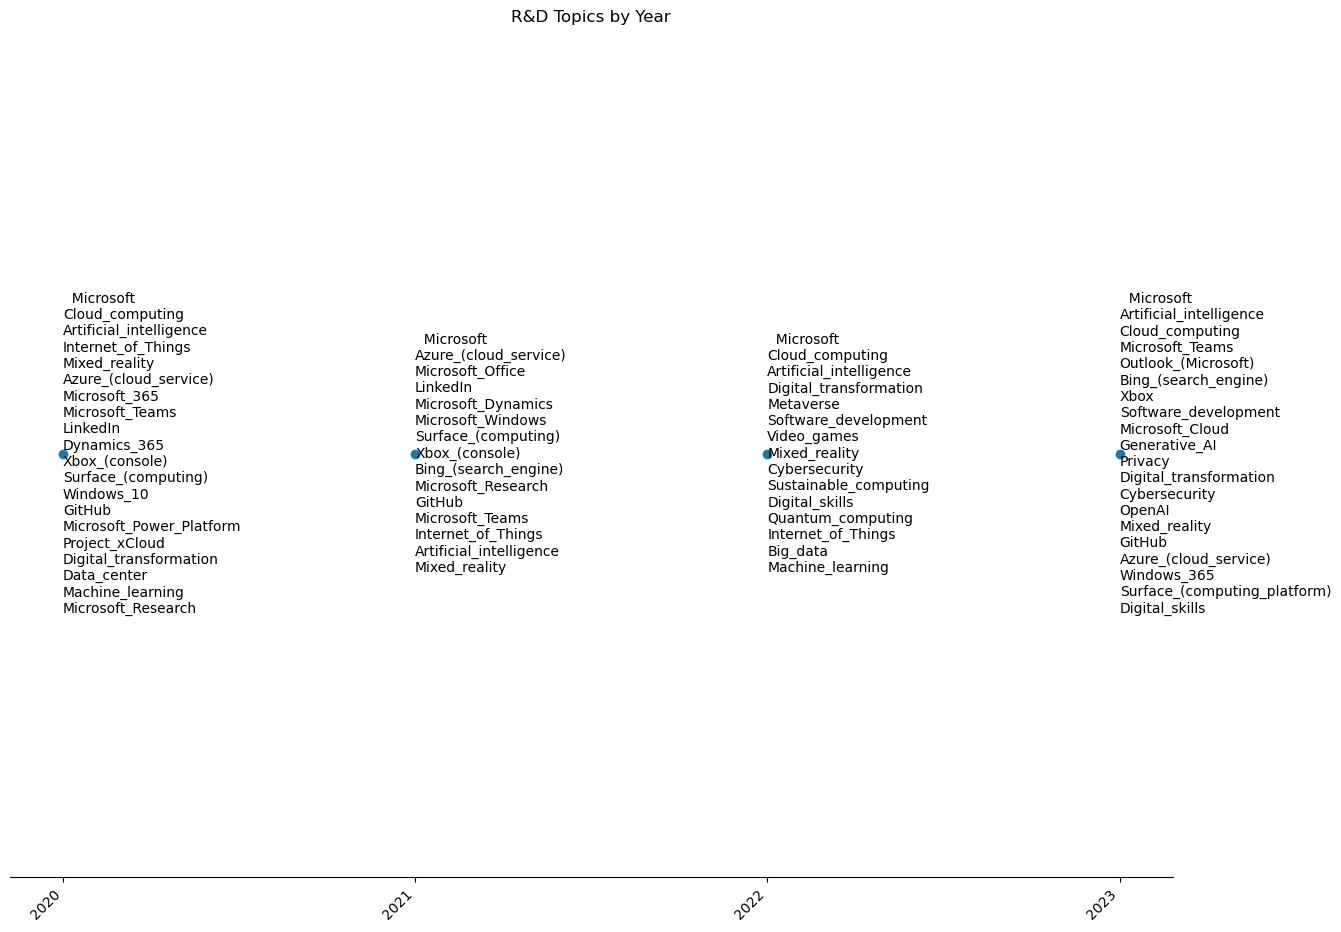

In [6]:
import matplotlib.pyplot as plt
def plot_topics(my_dict):
    """
    Plots R&D topics over the years as a scatter plot with annotations.

    This function takes a dictionary where each key is a year and each value is a list of topics
    related to R&D for that year. It generates a scatter plot with each year marked on the x-axis.
    Topics for each year are displayed as annotations next to the corresponding year mark on the plot.
    The y-axis is not used to encode data and is hidden.

    Parameters:
    - my_dict (dict): A dictionary with years as keys (int or str) and a list of strings (topics) as values.

    Returns:
    - None: The function directly displays the plot and does not return any value.

    Requires:
    - matplotlib.pyplot: This function relies on matplotlib for generating and displaying the plot.
    """
    fig, ax = plt.subplots(figsize=(15, 11))
    years = list(my_dict.keys())
    topics = ["\n".join(my_dict[year]) for year in years]


    ax.scatter(years, [1] * len(years))
    for i, topic in enumerate(topics):
        ax.text(years[i], 1, '  ' + topic, va='center')


    ax.get_yaxis().set_visible(False)  
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.xaxis.set_ticks_position('bottom')
    ax.set_xticks(years)
    ax.set_xticklabels(years, rotation=45, ha='right')
    ax.set_title('R&D Topics by Year')

    plt.show()
plot_topics(my_dict)

In [7]:
#Step 4:
#Instruct ChatGPT to enumerate the R&D topics for a specified year, as identified in the 10-K analyses.

In [8]:

def categorize_topics(year):
    """
    Extract DBPedia topics matching the research and development activities of 'Microsoft'
    from the given text using OpenAI's GPT model.
    
    Args:
        text (str): The text describing research and development activities.
    
    Returns:
        list: List of DBPedia topics.
    """
    research_info = []

    prompt = f"""List all primary investment themes by Microsoft in {year}, focusing on distinct categories without detailed descriptions.Provide output in the same format as:
    '1. Topic#1\n2. Topic#2\n3. Topic#3\n4.Topic#3\n5."""
    client = OpenAI(
        api_key="API-KEY"
    )

    completion = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # print(completion.choices[0].message)

    # Extract the generated research-related information
    generated_text = completion.choices[0].message.content
    # Append the generated information to the research_info list
    research_info.append(generated_text)
    return research_info

In [9]:
# Step 5:
# Establish a second dictionary to catalog lists of R&D topics for each year, this time derived from ChatGPT's research insights.


In [10]:
chat_gpt_dict = {}

research_info = categorize_topics("2020")
list_of_topics = sort_topics(research_info)
chat_gpt_dict[2020] = list_of_topics

research_info = categorize_topics("2021")
list_of_topics = sort_topics(research_info)
chat_gpt_dict[2021] = list_of_topics

research_info = categorize_topics("2022")
list_of_topics = sort_topics(research_info)
chat_gpt_dict[2022] = list_of_topics

research_info = categorize_topics("2023")
list_of_topics = sort_topics(research_info)
chat_gpt_dict[2023] = list_of_topics

In [11]:
print(chat_gpt_dict)

{2020: ['Cloud Computing', 'Artificial Intelligence (AI) & Machine Learning', 'Gaming & Esports', 'Cybersecurity', 'Quantum Computing', 'Productivity & Collaboration Tools', 'Healthcare Technology'], 2021: ['Cloud Computing and Infrastructure', 'Artificial Intelligence and Machine Learning', 'Gaming and eSports', 'Cybersecurity', 'Healthcare Technology', 'Remote Work and Collaboration Tools', 'Quantum Computing'], 2022: ['Cloud Computing & Infrastructure', 'Artificial Intelligence & Machine Learning', 'Cybersecurity', 'Gaming & Esports', 'Quantum Computing', 'Sustainability & Carbon Reduction Technologies', 'Healthcare & Biotechnology', 'Collaboration & Productivity Solutions'], 2023: ['Artificial Intelligence & Machine Learning', 'Cloud Computing & Infrastructure', 'Cybersecurity Solutions', 'Quantum Computing', 'Gaming & Virtual Reality', 'Productivity & Enterprise Solutions', 'Health Technology & Innovations']}


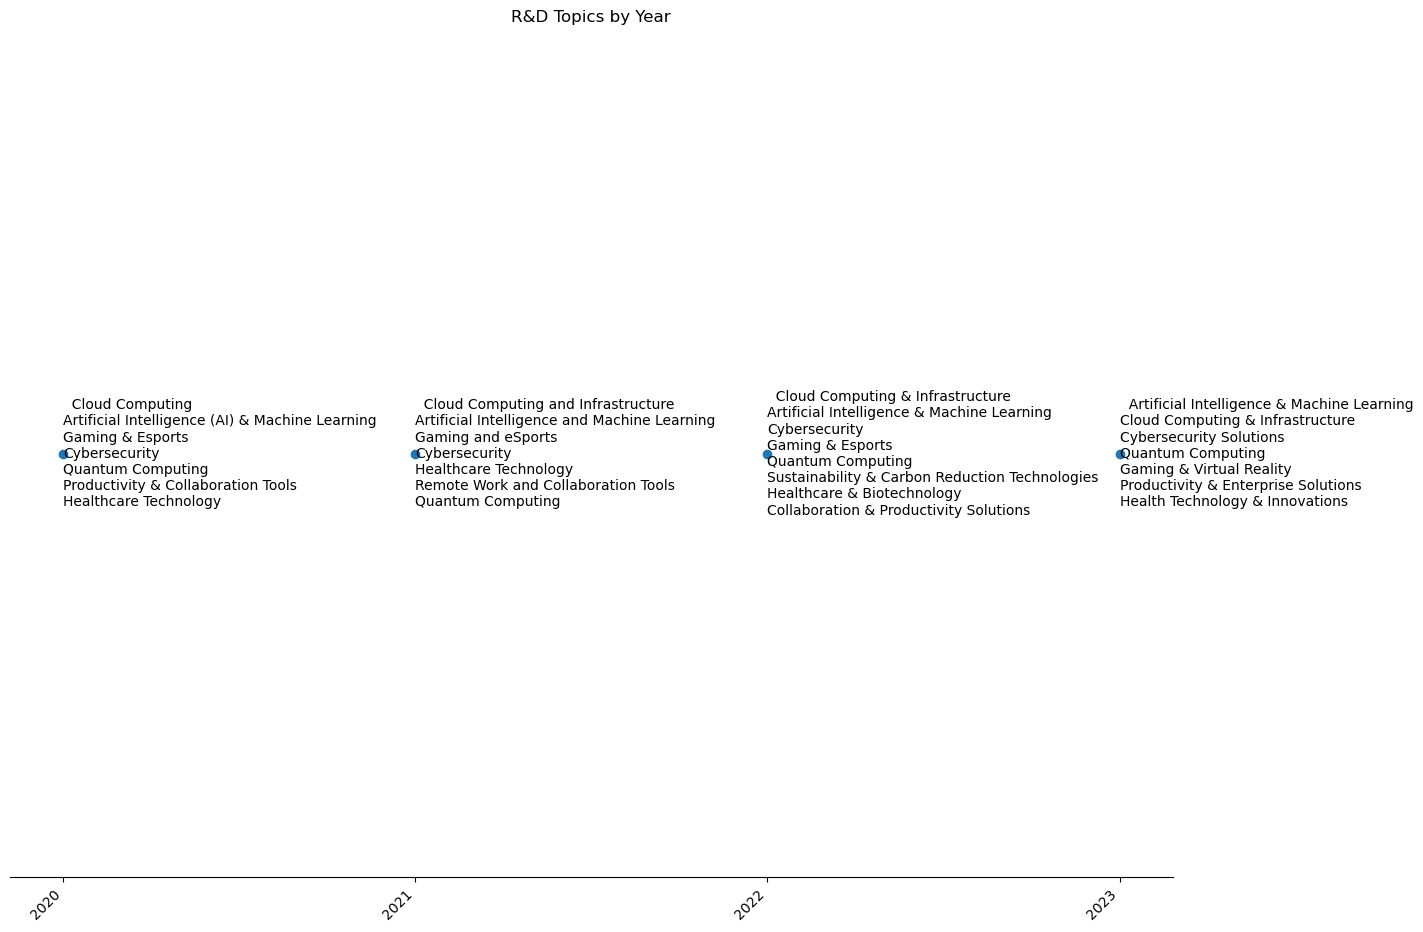

In [12]:
#Step 6:
#Graphically represent the R&D topics to illustrate trends and patterns.
plot_topics(chat_gpt_dict)

In [13]:
def categorize_patent(title, text):
    research_info = []
    topics = ['Cloud Computing and Infrastructure', 'Artificial Intelligence and Machine Learning', 'Gaming and Virtual Reality', 'Cybersecurity', 'Healthcare Technologies', 'Sustainability and Climate Technologies', 'Remote Work and Productivity Tools']
    prompt = f"""Given title: {title} and description {text} of the patent, categorize it into one of the major categories from this list: {topics}"""
    client = OpenAI(
        api_key="API-KEY"
    )

    completion = client.chat.completions.create(
        model="gpt-4-turbo-preview",
        messages=[
            {"role": "user", "content": prompt}
        ]
    )

    # print(completion.choices[0].message)

    # Extract the generated research-related information
    generated_text = completion.choices[0].message.content
    # Append the generated information to the research_info list
    research_info.append(generated_text)
    return research_info

In [14]:
#Step 7:
#Retrieve Microsoft's patent filings for a chosen year and gather relevant data.
#Step 8:
#Classify each patent into one of the predefined R&D topic categories, based on the patent's abstract, to understand the alignment with identified themes.


In [16]:
import urllib3
#import requests  # Import the requests library

# Disable SSL verification warnings
urllib3.disable_warnings(urllib3.exceptions.InsecureRequestWarning)

# Define the USPTO API endpoint and parameters for searching publication data
url = 'https://developer.uspto.gov/ibd-api/v1/application/publications'
params = {
    'publicationFromDate': '2022-09-01',
    # 'publicationToDate': '2022-12-31',
    'filingDateFromDate': '2022-09-01',
    # 'filingDateToDate': '2022-12-31',
    'assigneeEntityName': 'Microsoft'  # Adjusted for specificity
}
headers = {'accept': 'application/json'}

# Make the GET request to the USPTO API
response = requests.get(url, params=params, headers=headers, verify=False)

# Initialize variables for processing the response
count = 0
my_dict = {}

# Check if the request was successful
if response.status_code == 200:
    data = response.json()
    # Check if 'results' key exists in the response data
    if 'results' in data:
        for item in data['results']:
            patent_number = item.get('patentApplicationNumber', 'N/A')
            title = item.get('inventionTitle', 'N/A')
            abstractText = item.get('abstractText', 'N/A')
            
            # Print the retrieved patent data
            print('Patent Number:', patent_number)
            print('Title:', title)
            print('Abstract:', abstractText)
            print("Category: ")
            print(categorize_patent(title, abstractText))
            print('-----')
            
            # Increment the counter for each patent found
            count += 1
    else:
        print('No results found in the response data.')
else:
    print('Request failed with status code:', response.status_code)

# Print the total count of patents retrieved
print('Total patents found:', count)


Patent Number: US17943942
Title: Nested Access Privilege Check for Multi-Tenant Organizations
Abstract: ['Techniques for managing an access privilege for users of an organization having first and second tenants includes storing, at a data storage, first user account data of a first user account associated with a first user of the first tenant, the first user account data including a first object identifier, a first tenant identifier and first access privilege information including access privileges granted to the first user account of the first tenant to access one or more resources; creating, for the first user associated with the first tenant, a second user account of the second tenant and second user account data of the second user account; setting the second user account data to include linked account information including the first object identifier and the first tenant identifier of the first user account data; and storing, at the data storage, the second user account data includ